## Geha+25, Figure 4:  2D Flexure maps

In [1]:
import numpy as np
import os

from myplotstyle import plt,get_figsize

from astropy.table import Table
from astropy.io import ascii,fits
import glob

import matplotlib.backends.backend_pdf
from matplotlib.ticker import MultipleLocator

from dmost.core import dmost_utils,dmost_flexure

from scipy.optimize import curve_fit


DEIMOS_DROPBOX  = os.getenv('DEIMOS_RAW')
DEIMOS_REDUX    = os.getenv('DEIMOS_REDUX')

In [2]:
mask = 'f642_2'
nexp = 0

data_dir     = DEIMOS_REDUX + mask
spec1d_files = glob.glob(data_dir+'/Science/spec1d*fits')
hdu = fits.open(spec1d_files[nexp])

dmost_file = glob.glob(data_dir+'/dmost/dmost*')

In [3]:
slits, mask = dmost_utils.read_dmost(dmost_file[0])

In [4]:
xslit = slits['RA']
yslit = slits['DEC']
t=2.

mu  =  np.median(slits['fit_slope'][:,nexp])
sd  =  np.std(slits['fit_slope'][:,nexp])
mu2 =  np.median(slits['fit_b'][:,nexp])
sd2 =  np.std(slits['fit_b'][:,nexp])
mu3 =  np.median(slits['fit_lsf'][:,nexp])/mask['lsf_correction'][nexp]
sd3 =  np.std(slits['fit_lsf'][:,nexp])
mu4 =  np.median(slits['fit_lsf'][:,nexp])


Slope range: -0.0001 0.0001
Intercept range: -0.6046 0.2708


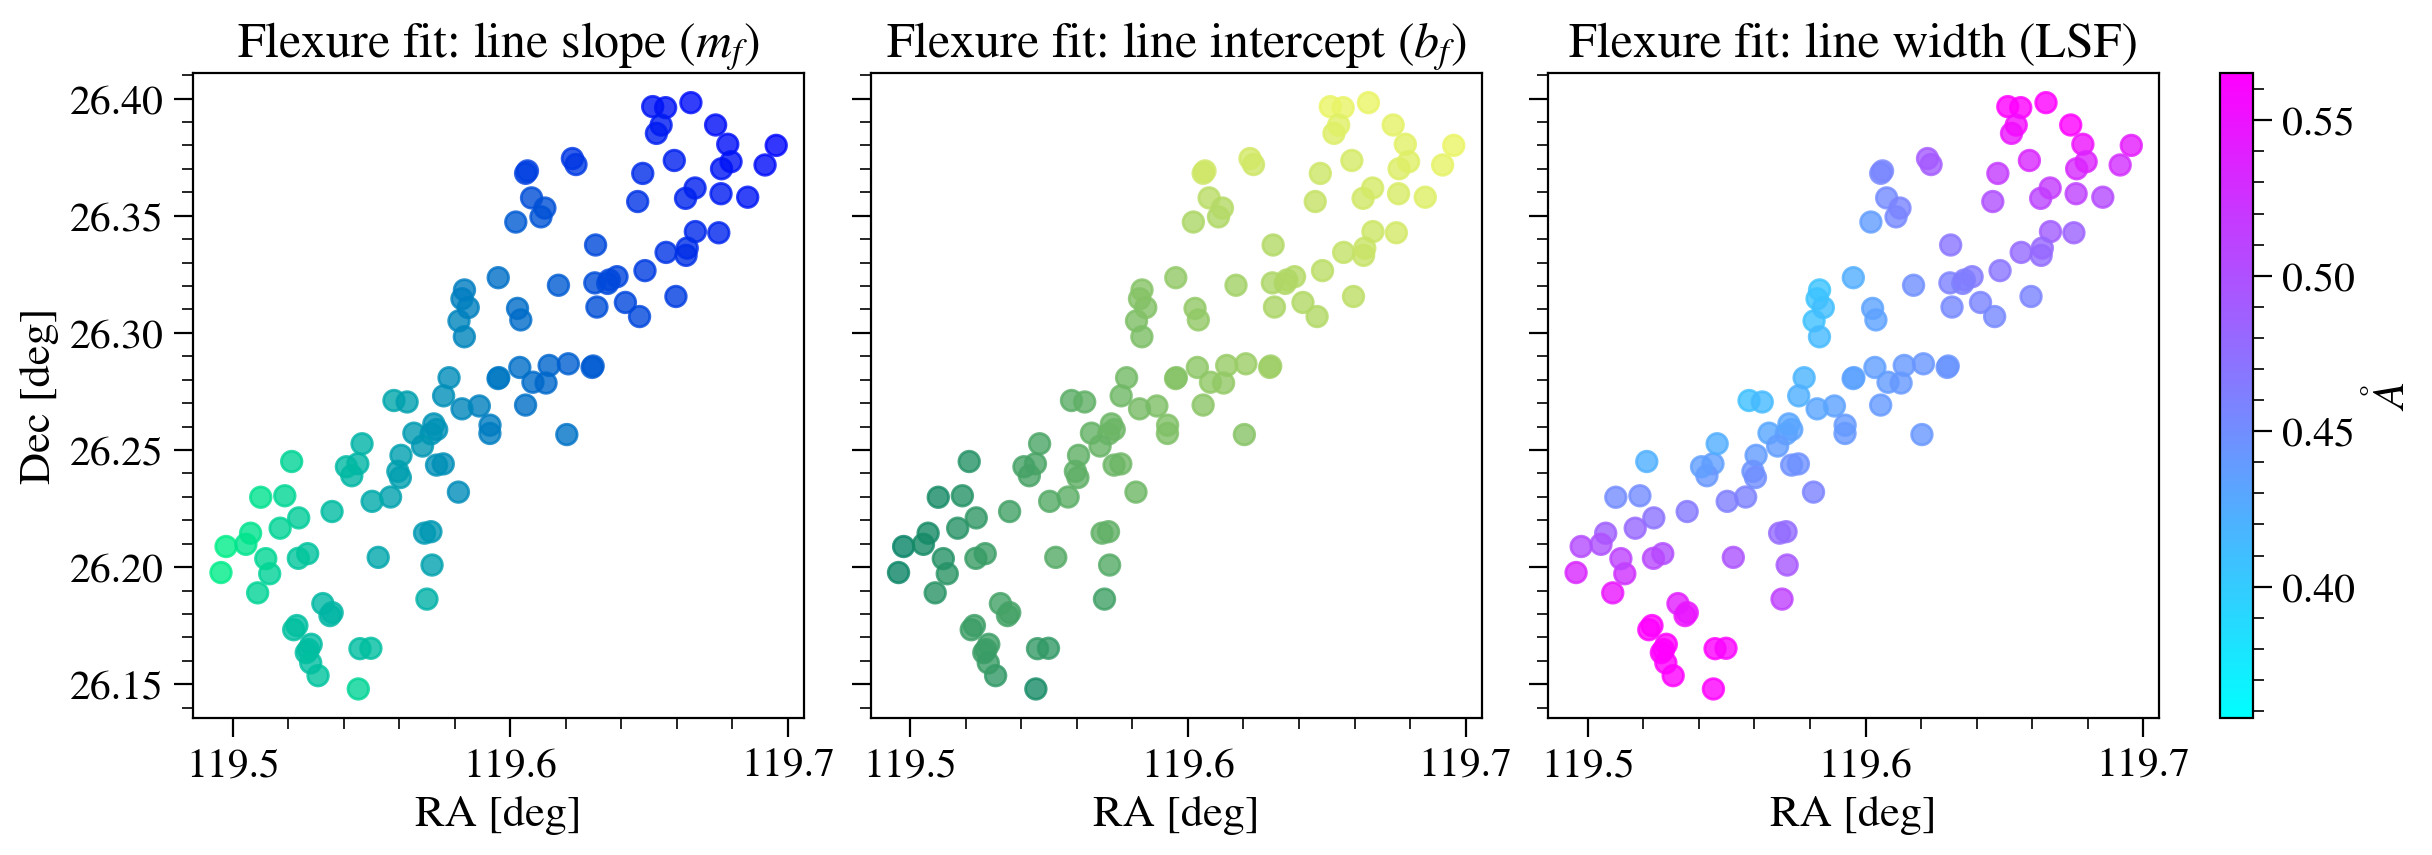

In [6]:
pdf = matplotlib.backends.backend_pdf.PdfPages('figure_flexure.pdf')
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=get_figsize(wide=True, ratio=3),sharey=True)


xslit = slits['RA']
yslit = slits['DEC']

sm = 55
ax1.scatter(xslit,yslit,c=slits['fit_slope'][:,nexp],cmap="winter",vmin = mu-t*sd,vmax=mu+t*sd,s=sm,alpha=0.8)
print('Slope range: {:0.4f} {:0.4f}'.format(mu-t*sd,mu+t*sd))

ax1.set_ylabel('Dec [deg]')
ax1.set_xlabel('RA [deg]')
ax1.set_title('Flexure fit: line slope ($m_f$)')

ax2.scatter(xslit,yslit,c=slits['fit_b'][:,nexp],cmap="summer",vmin = mu2-t*sd2,vmax=mu2+t*sd2,s=sm,alpha=0.8)
ax2.set_xlabel('RA [deg]')
ax2.set_title('Flexure fit: line intercept ($b_f$)')
print('Intercept range: {:0.4f} {:0.4f}'.format(mu2-t*sd2,mu2+t*sd2))

ax3.scatter(xslit,yslit,c=slits['fit_lsf'][:,nexp],cmap="cool",vmin = mu4-t*sd3,vmax=mu4+t*sd3,s=sm,alpha=0.8)
#ax3.set_ylabel('Dec [deg]')
ax3.set_xlabel('RA [deg]')
ax3.set_title('Flexure fit: line width (LSF)'.format(mask['lsf_correction'][nexp]))
cax, _ = matplotlib.colorbar.make_axes(ax3)
normalize = matplotlib.colors.Normalize(vmin = mu4-t*sd3,vmax=mu4+t*sd3)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=matplotlib.cm.cool,norm=normalize,label='$\AA$')


ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_major_locator(MultipleLocator(0.1))

pdf.savefig()
pdf.close()